# Detección de Sargazo

Proyecto final

**Reconocimiento de Patrones**, Facultad de Ingeniería. UNAM

20 de agosto de 2021

- Martínez Ostoa, Néstor Iván
- Ramírez Bondi, Jorge Alejandro

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from PIL import Image

In [34]:
img = imread('imgs/2021-05-27/1622157340.Thu.May.27_23_15_40.GMT.2021.morelos.c2.timex.png')
plt.figure(figsize=(6, 4))
imshow(img)

In [35]:
def img_pandas(img):
    df = pd.DataFrame(
        [
            img[:, :, 0].flatten(),
            img[:, :, 1].flatten(),
            img[:, :, 2].flatten()
        ]
    ).T
    df.columns = ['Red', 'Green', 'Blue']
    return df


df_img = img_pandas(img)
df_img

,Red,Green,Blue
0,-55,-55,-36
1,-71,-56,-36
2,-71,-56,-33
3,-74,-58,-33
4,-74,-58,-33
...,...,...,...
1228795,0,0,0
1228796,0,0,0
1228797,0,0,0
1228798,0,0,0


## K-Means

**Clústers de clasificación**

1. Cielo
2. Playa
3. Agua
4. Sargazo

/Users/alejandro/opt/anaconda3/envs/school/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


<Figure size 2000x600 with 0 Axes>

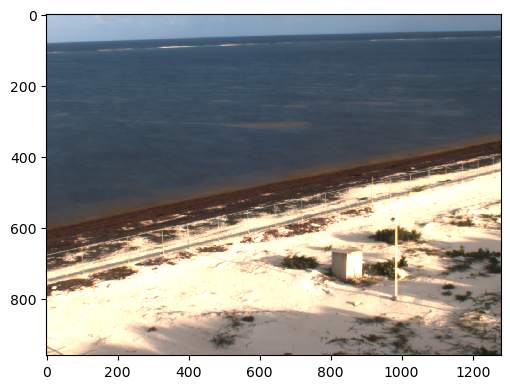

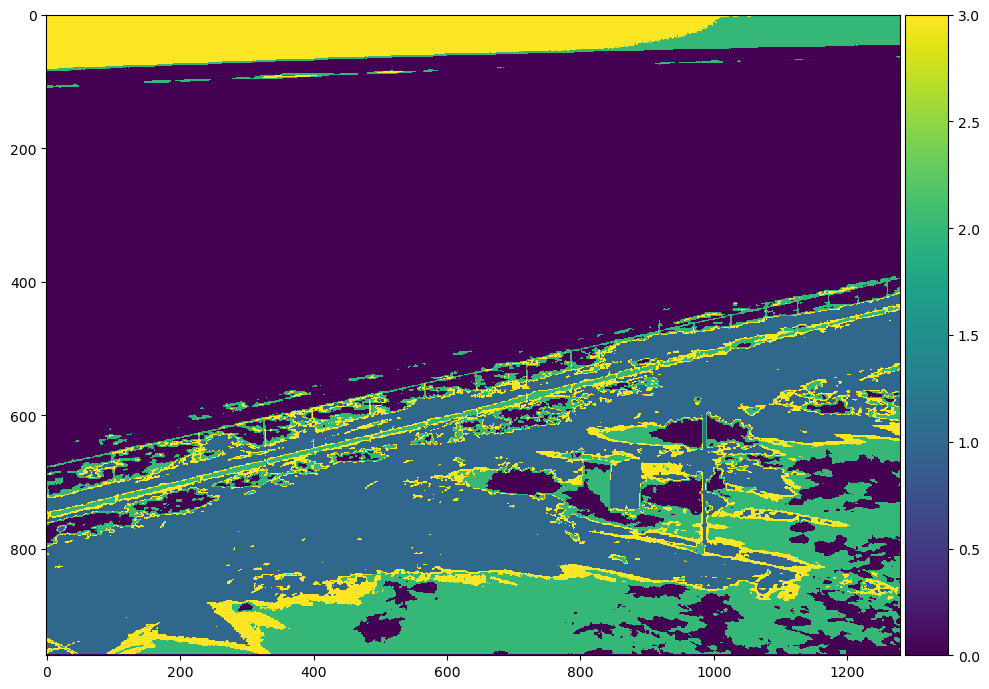

In [36]:
kmeans = KMeans(n_clusters=4, random_state=1304).fit(img.reshape(-1, 3))
class_img = kmeans.labels_.reshape(img.shape[0], img.shape[1])
plt.figure(figsize=(10, 8))
imshow(class_img, cmap='viridis')
plt.show()

## Felzenszwalb's segmentation

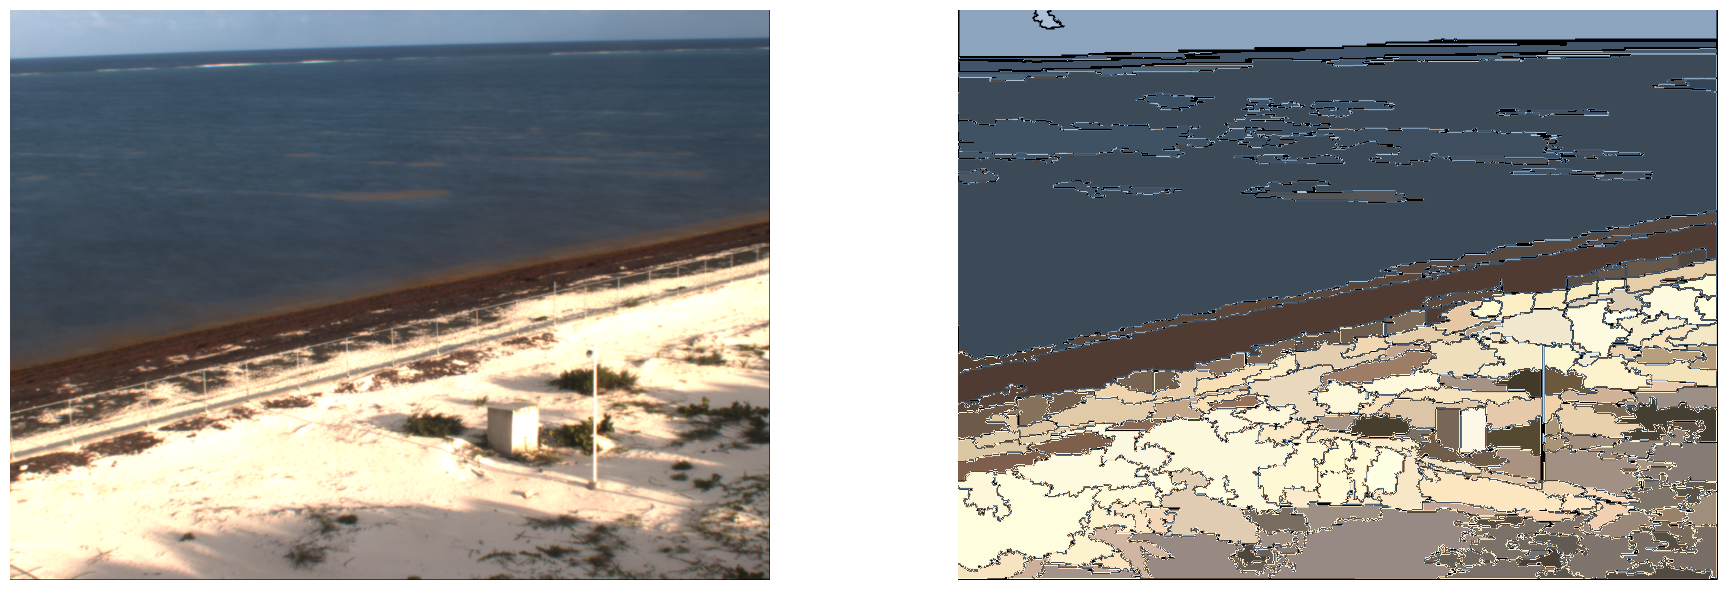

In [37]:
from matplotlib.colors import LinearSegmentedColormap
from skimage.segmentation import felzenszwalb, find_boundaries, mark_boundaries
from skimage.util import img_as_float


img = img_as_float(img)
plt.figure(figsize=(20, 6))
seg_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=700)
borders = find_boundaries(seg_fz)
unique_colors = np.unique(seg_fz.ravel())
seg_fz[borders] = -1
colors = [np.zeros(3)]
for color in unique_colors:
    colors.append(np.mean(img[seg_fz == color], axis=0))
cm = LinearSegmentedColormap.from_list('pallete', colors, N=len(colors))

# Plotting original
plt.subplot(121)
plt.imshow(img)
plt.axis('off')

# Plotting segmented image
plt.subplot(122)
plt.imshow(seg_fz, cmap=cm)
plt.axis('off')
plt.tight_layout()
plt.show()

### Obteniendo los segmentos uno a uno

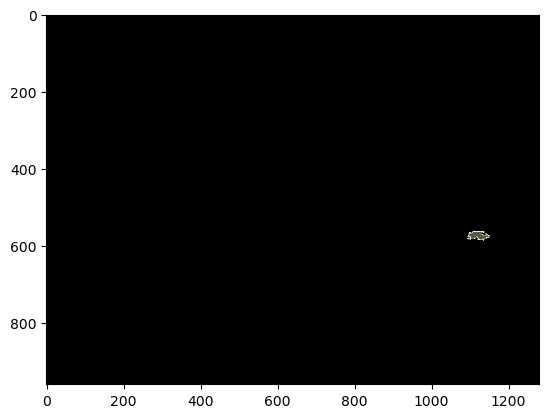

In [38]:
# TODO: 1. Ciclar esto para todas las imágenes y todos los segmentos únicos por
# imagen.
# 2. Almacenar cada imagen y clasificar
a = np.where(seg_fz != 74)
seg_fz_temp = seg_fz
seg_fz_temp[a] = 1
plt.imshow(seg_fz_temp, cmap=cm)
plt.show()